# Домашняя работа №3. Линейная регрессия

Цель работы: Обучить модель линейной регрессии с настройкой гиперпараметров.

### Работа с набором данных для задачи линейной регрессии (целевая переменная - непрерывное числовое значение)

## Задание №1

Цель: Получить чистые данные

#### Предварительная подготовка данных
* Заполнить пропуски в данных подходящими значениями (например, 0 для числовых значений, other для категориальных значений).
* Проверить датасет на дубликаты. Удалить при наличии.
* Закодировать категориальные значения. Например, создать новые булевые признаки (OneHotEncoder), или назначить число для каждого значения (LabelEncoder).
* Удалить столбцы с уникальными значениями, при наличии.
* К числовым признакам применить масштабирование со средним нулевым значением.
* Разделить на тренировочную и обучающую выборки.

In [2]:
import pandas as pd

data = pd.read_csv('../flight_price_prediction.csv')

In [3]:
# пропуски
data.isnull().sum()

airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

In [4]:
# повторы
duplicates = data.duplicated()
num_duplicated = duplicates.sum()
num_duplicated

np.int64(0)

#### Преобразование значений

In [5]:
columns = data.columns
for col in columns[:-3]:
    print(col, data[col].unique())

airline ['SpiceJet' 'AirAsia' 'Vistara' 'GO_FIRST' 'Indigo' 'Air_India']
flight ['SG-8709' 'SG-8157' 'I5-764' ... '6E-401' 'SG-6016' '6E-561']
source_city ['Delhi' 'Mumbai' 'Bangalore' 'Kolkata' 'Hyderabad' 'Chennai']
departure_time ['Evening' 'Early_Morning' 'Morning' 'Afternoon' 'Night' 'Late_Night']
stops ['zero' 'one' 'two_or_more']
arrival_time ['Night' 'Morning' 'Early_Morning' 'Afternoon' 'Evening' 'Late_Night']
destination_city ['Mumbai' 'Bangalore' 'Kolkata' 'Hyderabad' 'Chennai' 'Delhi']
class ['Economy']


In [6]:
# airline - One-Hot Encoding
airline_dummies = pd.get_dummies(data['airline'], prefix='airline')
data = pd.concat([data, airline_dummies], axis=1)
data.drop('airline', axis=1, inplace=True)

In [7]:
# source_city - One-Hot Ecnoding
source_city_dummies = pd.get_dummies(data['source_city'], prefix='source_city')
data = pd.concat([data, source_city_dummies], axis=1)
data.drop('source_city', axis=1, inplace=True)

In [8]:
# departure_time - One-Hot Ecnoding
departure_time_dummies = pd.get_dummies(data['departure_time'], prefix='departure_time')
data = pd.concat([data, departure_time_dummies], axis=1)
data.drop('departure_time', axis=1, inplace=True)

In [9]:
# stops - Label Encoding
stops_order = {'zero': 0, 'one': 1, 'two_or_more': 2}
data['stops'] = data['stops'].replace(stops_order)

/var/folders/cd/1jqr1m291vx1g_5dj8fnp7z40000gn/T/ipykernel_67222/3978822766.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['stops'] = data['stops'].replace(stops_order)


In [10]:
# arrival_time - One-Hot Ecnoding
arrival_time_dummies = pd.get_dummies(data['arrival_time'], prefix='arrival_time')
data = pd.concat([data, arrival_time_dummies], axis=1)
data.drop('arrival_time', axis=1, inplace=True)

In [11]:
# destination_city - One-Hot Ecnoding
destination_city_dummies = pd.get_dummies(data['destination_city'], prefix='destination_city')
data = pd.concat([data, destination_city_dummies], axis=1)
data.drop('destination_city', axis=1, inplace=True)

#### Удаление

In [12]:
# удаление class - 1 значение (Economy)
data.drop('class', axis=1, inplace=True)
data.drop('flight', axis=1, inplace=True)

#### Масштабирование

In [13]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

data[['duration', 'days_left', 'price']] = scaler.fit_transform(data[['duration', 'days_left', 'price']])

#### Разделение на train и test

In [14]:
from sklearn.model_selection import train_test_split

X = data[['stops', 'duration', 'days_left', 'airline_AirAsia',
       'airline_Air_India', 'airline_GO_FIRST', 'airline_Indigo',
       'airline_SpiceJet', 'airline_Vistara', 'airline_AirAsia',
       'airline_Air_India', 'airline_GO_FIRST', 'airline_Indigo',
       'airline_SpiceJet', 'airline_Vistara', 'source_city_Bangalore',
       'source_city_Chennai', 'source_city_Delhi', 'source_city_Hyderabad',
       'source_city_Kolkata', 'source_city_Mumbai', 'departure_time_Afternoon',
       'departure_time_Early_Morning', 'departure_time_Evening',
       'departure_time_Late_Night', 'departure_time_Morning',
       'departure_time_Night', 'arrival_time_Afternoon',
       'arrival_time_Early_Morning', 'arrival_time_Evening',
       'arrival_time_Late_Night', 'arrival_time_Morning', 'arrival_time_Night',
       'destination_city_Bangalore', 'destination_city_Chennai',
       'destination_city_Delhi', 'destination_city_Hyderabad',
       'destination_city_Kolkata', 'destination_city_Mumbai']]
y = data['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Размер тренировочной выборки X_train: {X_train.shape}")
print(f"Размер тестовой выборки X_test: {X_test.shape}")

Размер тренировочной выборки X_train: (160122, 39)
Размер тестовой выборки X_test: (40031, 39)


## Задание №2

#### Обучение модели линейной регресии
* Обучите модель линейно регресии методом градиентного спуска с помощь класса SGDRegressor в Sklearn с параметрами по умолчанию.
* Вычислить метрики R2, RMSE на тренировочной и тестовой выборках.
* Сделать вывод о качестве обученной модели.

In [15]:
import numpy as np
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error, r2_score


model = SGDRegressor(random_state=42)
model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

rmse_train = np.square(mean_squared_error(y_train, y_train_pred))
rmse_test = np.square(mean_squared_error(y_test, y_test_pred))

print("Модель SGDRegressor:")
print(f"R2 (Train): {r2_train:.4f}, R2 (Test): {r2_test:.4f}")
print(f"RMSE (Train): {rmse_train:.4f}, RMSE (Test): {rmse_test:.4f}")

Модель SGDRegressor:
R2 (Train): 0.5011, R2 (Test): 0.5105
RMSE (Train): 0.2504, RMSE (Test): 0.2340


#### Вывод
R2 значение 0.5011 (50.11%) на тренировочной выборке означает, что модель объясняет примерно 50% вариации данных. Аналогично для тестовой выборки: 51.05%
Это указывает на умеренную точность модели. Близость значений тренировочной и тестовой выборки показывает, что модель не переобучена

RMSE значения в районе 0.23-0.25 указывают, что модель делает относительно небольшие ошибки в предсказаниях.

Общее качество: не переобучена, умеренное качетсво предсказаний, однако объясняется только половина данных.

## Задание №3

#### Настройка регуляризации модели
* Обучите модель линейно регресии методом градиентного спуска в Sklearn с параметров регуляризации l1, l2, elasticnet для значений alpha [0.01, 0.3, 0.5, 0.8].
* Вычислить метрики R2, RMSE на тренировочной и тестовой выборках.
* Сделать вывод о качестве обученной модели.
* Приведите графики со значениянми метрик.

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import Lasso, Ridge, ElasticNet


alphas = [0.01, 0.3, 0.5, 0.8]

results = {
    "Model": [],
    "Alpha": [],
    "R2_Train": [],
    "R2_Test": [],
    "RMSE_Train": [],
    "RMSE_Test": []
}

def train_and_evaluate_model(Model, name):
    for alpha in alphas:
        model = Model(alpha=alpha, random_state=42)
        model.fit(X_train, y_train)

        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)

        r2_train = r2_score(y_train, y_train_pred)
        r2_test = r2_score(y_test, y_test_pred)
        rmse_train = mean_squared_error(y_train, y_train_pred)
        rmse_test = mean_squared_error(y_test, y_test_pred)

        results["Model"].append(name)
        results["Alpha"].append(alpha)
        results["R2_Train"].append(r2_train)
        results["R2_Test"].append(r2_test)
        results["RMSE_Train"].append(rmse_train)
        results["RMSE_Test"].append(rmse_test)


train_and_evaluate_model(Lasso, "Lasso")
train_and_evaluate_model(Ridge, "Rigde")
train_and_evaluate_model(ElasticNet, "ElasticNet")

results_df = pd.DataFrame(results)

results_df

,Model,Alpha,R2_Train,R2_Test,RMSE_Train,RMSE_Test
0,Lasso,0.01,0.490301,0.499122,0.511213,0.494920
1,Lasso,0.30,0.224653,0.227607,0.777650,0.763206
2,Lasso,0.50,0.064904,0.065852,0.937873,0.923037
3,Lasso,0.80,0.000000,-0.000020,1.002970,0.988126
4,Rigde,0.01,0.501555,0.510622,0.499925,0.483557
5,Rigde,0.30,0.501555,0.510622,0.499925,0.483557
6,Rigde,0.50,0.501555,0.510622,0.499925,0.483557
7,Rigde,0.80,0.501555,0.510622,0.499925,0.483557
8,ElasticNet,0.01,0.497486,0.506557,0.504006,0.487574
9,ElasticNet,0.30,0.316036,0.321447,0.685996,0.670482


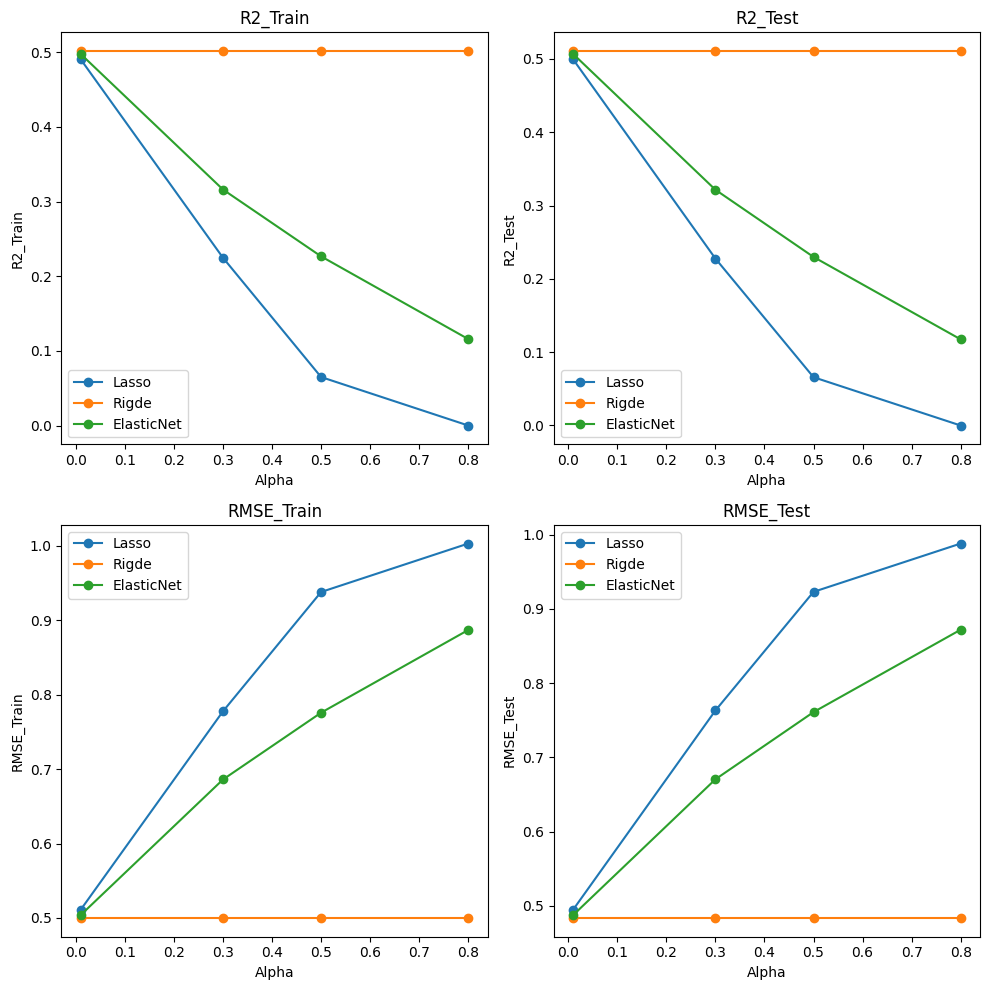

In [17]:
fig, axs = plt.subplots(2, 2, figsize=(10, 10))

for i, metric in enumerate(["R2_Train", "R2_Test", "RMSE_Train", "RMSE_Test"]):
    ax = axs[i // 2, i % 2]
    for model in results_df["Model"].unique():
        model_data = results_df[results_df["Model"] == model]
        ax.plot(model_data["Alpha"], model_data[metric], label=model, marker='o')
    ax.set_title(metric)
    ax.set_xlabel("Alpha")
    ax.set_ylabel(metric)
    ax.legend()

plt.tight_layout()
plt.show()

#### Выводы
##### Lasso (L1-регуляризация):
- alpha = 0.01:
R2 для тренировочной (0.490) и тестовой (0.499) выборок довольно близки.
Низкие значения RMSE (0.511 и 0.495) показывают, что модель хорошо предсказывает данные, но все еще можно улучшить.

- alpha = 0.3, 0.5, 0.8: 
С ростом alpha все ухудшается. R2 снижается (0.224 -> 0.000), RMSE увеличивается (0.778 -> 1.003)
Это говорит о том, что сильная регуляризация приводит к недообучению.

Для Lasso лучшее качество на тренировочной и тестовой выборках достигается при alpha = 0.01.

##### Ridge (L2-регуляризация):
- Независимо от alpha (0.01, 0.3, 0.5, 0.8) R2 и RMSE остаются неизменными (R2 = 0.501, RMSE = 0.500)
Ridge показывает стабильные результаты, но не показыает улучшения с увеличением alpha. Это свидетельствует о слабом влиянии L2 на данные.

##### ElasticNet (L1, L2):
- alpha = 0.01:
Хорошее качетсво (R2 = 0.497 и 0.507, RMSE = 0.504 и 0.488). Близкие результаты к Lasso и Ridge c alpha = 0.01.

- alpha = 0.3, 0.5, 0.8:
С ростом качество модели ухудшается: R2 падает (0.316 -> 0.116), RMSE увеличивается (0.686 -> 0.887). Это указывает на то, что комбинации L1 и L2 становится слишком сильной при большом alpha.

ElasticNet показывает лучшие результаты при alpha = 0.01, но более сильная регуляризация приводит к недообучению.

## Задание №4

#### Настройка гиперпараметров модели.
* Обучите модель линейно регресии методом градиентного спуска в Sklearn с лучшим параметров регуляризации и alpha значением при разном количестве итераций.
* Вычислить метрики R2, RMSE на тренировочной и тестовой выборках.
* Сделать вывод о качестве обученной модели.

In [18]:
import numpy as np
import pandas as pd
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt


best_alpha = 0.01
regularization = "l2"

iterations = [100, 500, 1000, 5000]

results = []

for max_iter in iterations:
    model = SGDRegressor(
        penalty=regularization,
        alpha=best_alpha,
        max_iter=max_iter,
        random_state=42
    )
    
    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    r2_train = r2_score(y_train, y_train_pred)
    r2_test = r2_score(y_test, y_test_pred)
    rmse_train = np.square(mean_squared_error(y_train, y_train_pred))
    rmse_test = np.square(mean_squared_error(y_test, y_test_pred))

    results.append({
        'Iterations': max_iter,
        'R2_Train': r2_train,
        'R2_Test': r2_test,
        'RMSE_Train': rmse_train,
        'RMSE_Test': rmse_test
    })
    
    results_df = pd.DataFrame(results)
    print(results_df)

   Iterations  R2_Train   R2_Test  RMSE_Train  RMSE_Test
0         100  0.500523  0.509954    0.250961   0.234466
   Iterations  R2_Train   R2_Test  RMSE_Train  RMSE_Test
0         100  0.500523  0.509954    0.250961   0.234466
1         500  0.500523  0.509954    0.250961   0.234466
   Iterations  R2_Train   R2_Test  RMSE_Train  RMSE_Test
0         100  0.500523  0.509954    0.250961   0.234466
1         500  0.500523  0.509954    0.250961   0.234466
2        1000  0.500523  0.509954    0.250961   0.234466
   Iterations  R2_Train   R2_Test  RMSE_Train  RMSE_Test
0         100  0.500523  0.509954    0.250961   0.234466
1         500  0.500523  0.509954    0.250961   0.234466
2        1000  0.500523  0.509954    0.250961   0.234466
3        5000  0.500523  0.509954    0.250961   0.234466


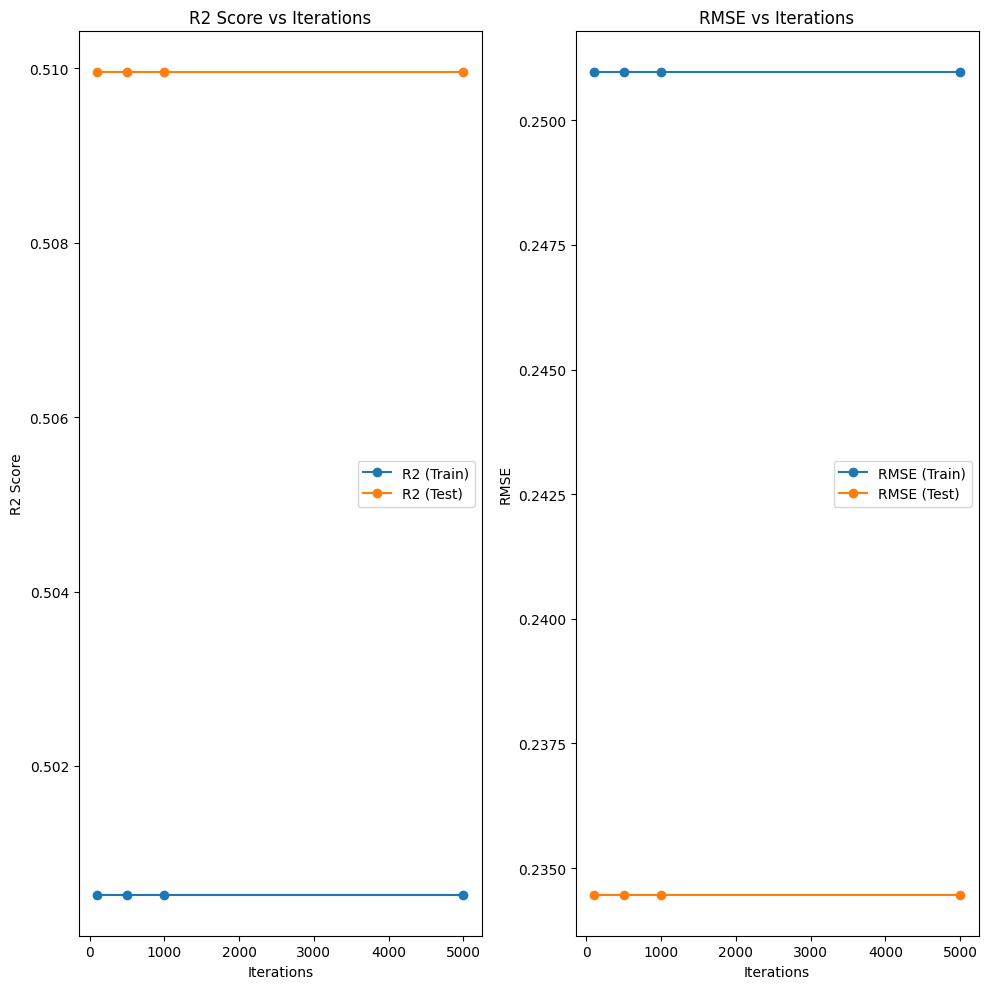

In [19]:
plt.figure(figsize=(10, 10))

# R2
plt.subplot(1, 2, 1)
plt.plot(results_df['Iterations'], results_df['R2_Train'], label='R2 (Train)', marker='o')
plt.plot(results_df['Iterations'], results_df['R2_Test'], label='R2 (Test)', marker='o')
plt.xlabel('Iterations')
plt.ylabel('R2 Score')
plt.title('R2 Score vs Iterations')
plt.legend()

# RMSE
plt.subplot(1, 2, 2)
plt.plot(results_df['Iterations'], results_df['RMSE_Train'], label='RMSE (Train)', marker='o')
plt.plot(results_df['Iterations'], results_df['RMSE_Test'], label='RMSE (Test)', marker='o')
plt.xlabel('Iterations')
plt.ylabel('RMSE')
plt.title('RMSE vs Iterations')
plt.legend()

plt.tight_layout()
plt.show()

### Выводы

Метрики: 
- R2 на тренировочной выборке 0.500523, на тестовой - 0.509954. Говорит, что модель объясняет около 50% вариативности. 
- RMSE на тренировочной выборке 0.250961, на тестовой - 0.234466. 

Количество итераций:
- Модель сходится быстро, видимо, достигает своего оптимума и увеличение количества итераций не приносит изменений.

Изменение значений alpha ухудшает модель.